In [1]:
# project: p9
# submitter: hko26
# partner: dkim598

In [2]:
import os, json, csv, pandas
import pandas as pd

In [3]:
#Q1: What are the names of the files present in the data directory?
def get_names(directory):
    file_list = os.listdir(directory)
    return sorted(file_list, reverse = True) 
get_names('data')

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json']

In [4]:
def get_paths(data,file_type = 'all'):
    file_list = os.listdir(data)
    org_string = file_type.lower()
    path_list = []
    if file_type == 'all':
        for paths in file_list:
            path_list.append(os.path.join(data, paths))
    elif org_string == 'json': 
        # https://stackoverflow.com/questions/21772194/how-to-differentiate-between-two-different-type-of-files-in-python-2-7
        for paths in file_list:
            if paths.endswith('.json'):
                path_list.append(os.path.join(data, paths))
    
    elif org_string == 'csv':
        for paths in file_list:
            if paths.endswith('.csv'):
                path_list.append(os.path.join(data, paths))
    
    return sorted(path_list, reverse = True) 

In [5]:
#Q2: What are the paths of all the files in the data directory?
get_paths("data")

['data\\sample_reviews.json',
 'data\\sample_reviews.csv',
 'data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv',
 'data\\products.json']

In [6]:
#Q3: What are the paths of all the JSON files present in data directory?
get_paths("data", 'json')

['data\\sample_reviews.json',
 'data\\review5.json',
 'data\\review4.json',
 'data\\review3.json',
 'data\\review2.json',
 'data\\review1.json',
 'data\\products.json']

In [7]:
#Q4: What are the paths of all the files present in data directory, that begin with the phrase 'review'?
def get_paths_startswith(data, phrase):
    file_list = get_paths('data')
    inclusion_list = []
    for path in file_list:
        file_name = os.path.basename(path)
        if file_name.startswith('review'):
            inclusion_list.append(path)
    return sorted(inclusion_list, reverse = True)

def get_names_startswith(data, phrase):
    file_list = get_names('data')
    inclusion_list = []
    for name in file_list:
        if name.startswith(phrase):
            inclusion_list.append(name)
    return sorted(inclusion_list, reverse = True)

get_paths_startswith("data", "review")

['data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv']

In [8]:
#Q5: What are the products in products.json?
def read_json(json_filename):
    f = open(os.path.join("data", json_filename), encoding="utf-8")
    string = f.read()
    json_str = json.loads(string)
    f.close()
    
    return json_str

read_json("products.json")

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [9]:
#Q6: What is the review text of review with id 84440?
def read_csv(csv_filename):
    f = open(os.path.join("data", csv_filename), encoding="utf-8")
    reader = csv.DictReader(f)
    review_list = []
    for row in reader:
        review_list.append(row)
    f.close()
    return review_list

def get_review(id, phrase = 'review'):
    whole_csv = get_names_startswith("data", phrase)
    target_list = []
    
    for csv in whole_csv:
        if csv.endswith('csv'):
            target_list.append(csv)
      
    for review_files in target_list:
        whole_review = read_csv(review_files)
        for review in whole_review:
            if review["review id"] == id:
                return review['review text']

get_review("84440")

'I would recommend this product. It works great and ver compact.'

In [10]:
#Q7: What is the review text of review with id 28615?
get_review("28615")

'Loveeeeeeeee........................................'

In [11]:
#Q8: What file contained the review with id 69273?
def get_file_from_id(id, phrase = 'review'):
    whole_csv = get_names_startswith("data", phrase)
    target_list = []
    
    for csv in whole_csv:
        if csv.endswith('csv'):
            target_list.append(csv)
      
    for review_files in target_list:
        whole_review = read_csv(review_files)
        for review in whole_review:
            if review["review id"] == id:
                return review_files
get_file_from_id('69273')

'review2.csv'

In [12]:
#Q9: What is the data stored in sample_reviews.json?
read_json("sample_reviews.json")

{'46663': ['Dmh1589', 'B018Y229OU'],
 '36363': ['Shoot2thril', 'B018Y229OU'],
 '15763': ['Barbara', 'B018Y229OU'],
 '5463': ['Elec8', 'B018Y229OU'],
 '54066': ['Silvrblur', 'B018Y229OU'],
 '33466': ['Trish', 'B018Y229OU'],
 '40869': ['airbear', 'B018Y229OU'],
 '30569': ['lorphe', 'B018Y229OU'],
 '89472': ['felix', 'B018Y229OU'],
 '48272': ['Bull99', 'B018Y229OU']}

In [13]:
from collections import namedtuple

In [14]:
#Q10: What is produced by your function get_reviews('sample_reviews.csv', 'sample_reviews.json')?
def convert_to_boolean(string):
    if string.lower() == 'true':
        return True
    elif string.lower() == 'false':
        return False

def get_reviews(review_csv, review_json):
    Review = namedtuple('Review', ['id', 'username', 'asin', 'title', 'text','rating', 'do_recommend', 'num_helpful', 'date'])
    review_list = []
    try: # try~except for error in the process of reading review3.json
        csv_data = read_csv(review_csv)
        json_data = read_json(review_json)
    except:
        return []
      
    for review in csv_data:
        try: # try~except for error-inducing cells from review2.csv
            user_id = int(review['review id']) 
            user_username = json_data[review['review id']][0]
            user_asin = json_data[review['review id']][1]
            user_title = review['review title'] 
            user_text = review['review text'] 
            uesr_rating = int(review['review rating']) 
            user_do_recommend = convert_to_boolean(review['review do_recommend']) 
            user_num_helpful = int(review['review num_helpful'])
            user_date = review['review date'] 
            
            if user_title == '' or user_text == '' or user_date == '': # skip 'none' cells in review2
                continue
        except:
            continue
        
        content = Review(user_id, user_username, user_asin ,user_title ,user_text , uesr_rating, 
              user_do_recommend, user_num_helpful, user_date)
        review_list.append(content)
    
    return review_list

          
get_reviews('sample_reviews.csv', 'sample_reviews.json')

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [15]:
#Q11: What are the first ten Review objects in the list produced by get_reviews('review4.csv', 'review4.json')?
answer = get_reviews('review4.csv', 'review4.json')
answer[:10]

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [16]:
#Q12: What are the last ten Review objects in the list produced by get_reviews('review2.csv', 'review2.json')?
q12_answer = get_reviews('review2.csv', 'review2.json')
q12_answer[-10:]

[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [17]:
#Q13: What is the Review object with review id 25401?
def get_review_object(id):
    object_csv = get_file_from_id(id, phrase = 'review')
    object_json = object_csv.split(".")[0] + ".json"
    total_reviews = get_reviews(object_csv, object_json)
    
    for review in total_reviews:
        if review.id == int(id):
            return review
    
get_review_object("25401")

Review(id=25401, username='Brody16', asin='B018Y229OU', title='Wonderful for our grandsons', text='Love the ease of using them for our grandsons and they enjoyed them for Christmas', rating=1, do_recommend=True, num_helpful=0, date='2017-01-06')

In [18]:
#Q14: What is the Review object with review id 78626?
get_review_object("78626")

Review(id=78626, username='Mijenx', asin='B01AHB9CN2', title='Ended up returning', text='I bought this tablet for my 4 year old daughter. Too many advertisements. I would rather pay more and not have a single ad.', rating=1, do_recommend=False, num_helpful=2, date='2016-11-25')

In [19]:
def get_review_file(input):
    total_review_files = get_names_startswith("data", "review")
    new_list = []
    if input == 'csv':
        for file in total_review_files:
            if file.endswith('csv'):
                new_list.append(file) 
    elif input == 'json':
        for file in total_review_files:
            if file.endswith('json'):
                new_list.append(file)
    return new_list

In [20]:
def get_total_reviews():
    csv_list= get_review_file('csv')
    json_list= get_review_file('json')
    total_reviews = []
    for i in range(5):
        total_reviews += get_reviews(csv_list[i], csv_list[i][:-3]+"json")
    return total_reviews

get_total_reviews()

[Review(id=77848, username='bijju', asin='B018Y229OU', title='Decent tablet', text='This tablet from Amazon is decent. The performance of the tablet is de end too.', rating=3, do_recommend=True, num_helpful=0, date='2016-01-06'),
 Review(id=57248, username='dirk', asin='B018Y229OU', title='GREAT', text='GREAT TABLET FOR THE PRICE. KIDS LOVE IT. CANT BEAT IT.', rating=4, do_recommend=True, num_helpful=0, date='2016-01-06'),
 Review(id=64651, username='TanJ', asin='B018Y229OU', title='Great device for a child.', text='Purchased this device for a three year old. He loves it.', rating=4, do_recommend=True, num_helpful=0, date='2016-01-06'),
 Review(id=72054, username='Patience', asin='B018Y229OU', title='Great tablet', text='I bought themail kindle for my daughter to use at school. It was very convenient for her. She was able to do her assignmentshe off of it.', rating=5, do_recommend=True, num_helpful=0, date='2016-01-06'),
 Review(id=41154, username='Notal', asin='B018Y229OU', title='Goo

In [21]:
#Q15: List the first ten Review objects in the entire dataset, when the usernames are sorted in the reverse alphabetical order.
def get_ordered_reviews():
    total_reviews = get_total_reviews()
    # https://stackoverflow.com/questions/12087905/pythonic-way-to-sorting-list-of-namedtuples-by-field-name/54123931#54123931
    return sorted(total_reviews, key=lambda x: x.username, reverse = True)
get_ordered_reviews()[0:10]

[Review(id=29325, username='zerofighterblue', asin='B018Y229OU', title='cant live without', text='have a kindle with a broken screen. bought originally for 99.00. now regular price is 49.99 and were on sale black Friday for 34.99. got 2 more.', rating=5, do_recommend=True, num_helpful=1, date='2015-12-10'),
 Review(id=96947, username='zedog83', asin='B01AHB9CN2', title='Great for kids', text='Bought this for our 6 year old daughter and she uses it daily. She enjoys watching movies on it and playing learning games. So far it has been very durable and battery life has been great.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-18'),
 Review(id=77499, username='zcraig7', asin='B018Y229OU', title='Awesome picture quality', text='I bought two of these for black friday and the kids love them', rating=5, do_recommend=True, num_helpful=0, date='2016-01-04'),
 Review(id=48890, username='zarm7', asin='B018Y229OU', title='This is a nice tablet', text='I bought it for reading books. An

In [22]:
#Q16: Who are the top 22 prolific users in this dataset?
def bucketize(number = 'all', order = False):
    review_dict = {}
    final_dict = {}
    total_reviews = get_total_reviews()
    for review in total_reviews:
        username = review.username
        if username in review_dict: 
            review_dict[username] += 1
        else: 
            review_dict[username] = 1
    if order == True:
        review_dict = dict(sorted(review_dict.items(), key=lambda x: x[1], reverse = True))
    
    for data in review_dict:
        if number == 'all':
            final_dict[data] = review_dict[data]
        else:
            if len(final_dict) == number:
                break
            else:
                final_dict[data] = review_dict[data]    
    return final_dict
bucketize(22, True)

{'Missy': 4,
 '1234': 4,
 'Mike': 4,
 'Susan': 4,
 'Dave': 4,
 'Manny': 3,
 'Michael': 3,
 'Susie': 3,
 'Bill': 3,
 'James': 3,
 'Lisa': 3,
 'Kathy': 3,
 'paul': 3,
 'steve': 3,
 'John': 3,
 'Angie': 3,
 'Richard': 3,
 'Steve': 3,
 'Bubba': 3,
 'Chris': 3,
 'Grandma': 3,
 'Frank': 3}

In [23]:
#Q17: Who are the users whose comments have been found helpful at least five times?
def helpful_user():
    total_reviews = get_total_reviews()
    helpful_dict = {}
    for review in total_reviews:
        if review.num_helpful >= 5:
            if review.username in helpful_dict:
                helpful_dict[review.username] += review.num_helpful
            else:
                helpful_dict[review.username] = review.num_helpful
    return helpful_dict
helpful_user()

{'Raza': 5,
 'Rodge': 6,
 'Ellen': 10,
 'Karch': 5,
 'FrankW': 5,
 'Kime': 5,
 'Mark': 5,
 '1Briansapp': 5,
 'trouble': 5,
 'Stuartc': 8,
 'Earthdog': 27}

In [24]:
%matplotlib inline

In [25]:
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

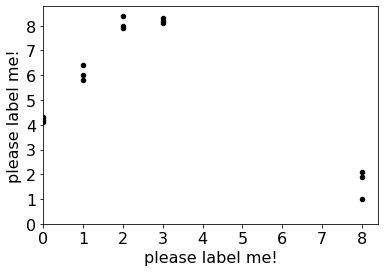

In [26]:
scatter([0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 8.0, 8.0, 8.0],
        [4.1, 4.3, 4.2, 5.8, 6.0, 6.4, 8.4, 8.0, 7.9, 8.3, 8.1, 8.2, 1.9, 2.1, 1.0])

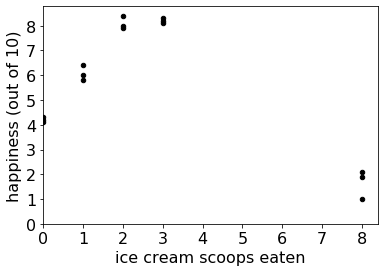

In [27]:
scatter([0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 8.0, 8.0, 8.0],
        [4.1, 4.3, 4.2, 5.8, 6.0, 6.4, 8.4, 8.0, 7.9, 8.3, 8.1, 8.2, 1.9, 2.1, 1.0],
        xlabel="ice cream scoops eaten", ylabel="happiness (out of 10)")

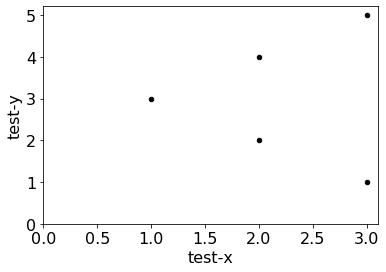

In [28]:
scatter([1.0, 2.0, 2.0, 3.0, 3.0],
        [3.0, 2.0, 4.0, 1.0, 5.0],
        xlabel="test-x", ylabel="test-y")

In [29]:
import statistics

def bucketize_rating_avg_text(attribute = 'rating'):
    rating_dict = {}
    final_dict = {}
    total_reviews = get_total_reviews()
    
    for review in total_reviews:
        rating = review.rating
        text = review.text
        if rating not in final_dict:
            final_dict[rating] = [len(text)] 
        else:
            final_dict[rating].append(len(text))
    
    for key in final_dict:
        final_dict[key] = statistics.mean(final_dict[key])
    
    return final_dict

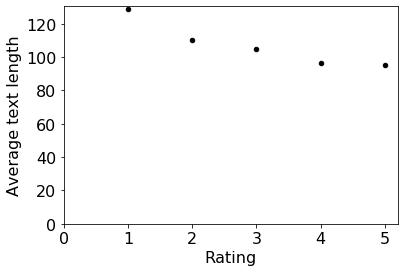

In [30]:
#Q18: What is the relationship between the rating and the average text length?
result = bucketize_rating_avg_text()
Rating = []
avg_text_len = []
for rating_key in result:
    Rating.append(rating_key)
    avg_text_len.append(result[rating_key])
    
scatter(Rating, avg_text_len, xlabel="Rating", ylabel="Average text length")

In [31]:
def bucketize_rating_review_likelihood():
    rating_dict = {}
    final_dict = {}
    total_reviews = get_total_reviews()
    
    for review in total_reviews:
        rating = review.rating
        helpful = review.num_helpful
        if rating not in final_dict:
            final_dict[rating] = [helpful] 
        else:
            final_dict[rating].append(helpful)
    for number in final_dict:
        count = 0
        for i in range(len(final_dict[number])):
            if final_dict[number][i] >= 1:
                count += 1
        final_dict[number] = count / len(final_dict[number])
                
    return final_dict

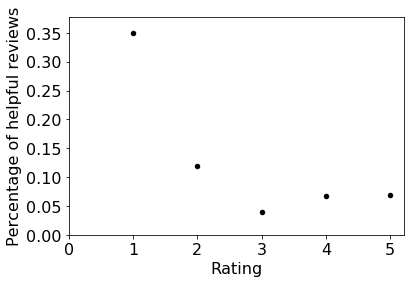

In [32]:
#Q19: What is the relationship between the rating and the likelihood of the review being helpful?
result = bucketize_rating_review_likelihood()
Rating = []
helpfulness = []

for rating_key in result:
    Rating.append(rating_key)
    helpfulness.append(result[rating_key])
scatter(Rating, helpfulness, xlabel="Rating", ylabel="Percentage of helpful reviews")

In [33]:
#Q20: Find the average rating of each product.
def get_avg_rating(name = 'english'):
    products = read_json("products.json")
    product_dict = {}
    final_dict = {}
    total_reviews = get_total_reviews()
    
    for product in products:
        product_dict[product] = []
        
    for review in total_reviews:
        rating = review.rating
        asin = review.asin
        product_dict[asin].append(rating)
    
    for product in product_dict:
        product_dict[product] = statistics.mean(product_dict[product])
    
    for product in products:
        final_dict[products[product]] = product_dict[product]
    
    if name == 'code':
        return product_dict
    elif name == 'english':
        return final_dict

get_avg_rating('english')

{'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New': 4.6909090909090905,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping': 5,
 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers': 4.666666666666667,
 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish': 5,
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case': 4.603448275862069,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black': 4.583333333333333,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,
 'Al

In [34]:
def num_reivews_with_avg_rating(outlier = "No"):
    product_ratings = get_avg_rating('code')
    total_reviews = get_total_reviews()
    final_dict = {}
    num_reviews_dict = {}
    for product in product_ratings:
        num_reviews_dict[product] = 0
        
    for review in total_reviews:
        asin = review.asin
        num_reviews_dict[asin] += 1
    
    for product in num_reviews_dict:
        final_dict[num_reviews_dict[product]] = product_ratings[product]
    
    if outlier == "No":
        return final_dict
    
    elif outlier == "Yes":
        outlier_dict = {}
        for num_review in final_dict:
            if num_review <= 500:
                outlier_dict[num_review] = final_dict[num_review]
        return outlier_dict

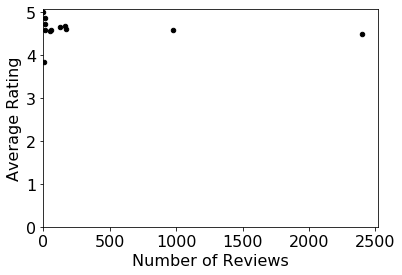

In [35]:
#Q21: What is the relationship between the number of reviews and the average rating of a product?
result = num_reivews_with_avg_rating()
num_reviews = []
avg_rating = []

for key in result:
    num_reviews.append(key)
    avg_rating.append(result[key])
scatter(num_reviews, avg_rating, xlabel="Number of Reviews", ylabel="Average Rating")

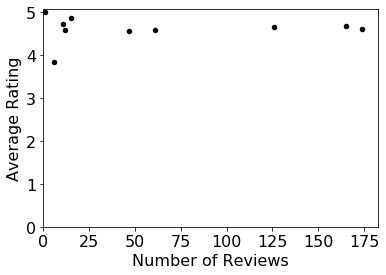

In [36]:
#Q22: Remove the outliers from the last plot.
result = num_reivews_with_avg_rating("Yes")
num_reviews = []
avg_rating = []

for key in result:
    num_reviews.append(key)
    avg_rating.append(result[key])
scatter(num_reviews, avg_rating, xlabel="Number of Reviews", ylabel="Average Rating")

In [37]:
def plot_dict(d, label="Number of Reviews"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [38]:
def month_with_num_reviews(product):
    total_reviews = get_total_reviews()
    month_dict = {}
    for review in total_reviews:
        if review.asin == product:
            date = review.date
            month = review.date.split("-")[1]
            if month not in month_dict:
                month_dict[month] = 1
            else:
                month_dict[month] += 1
    return month_dict

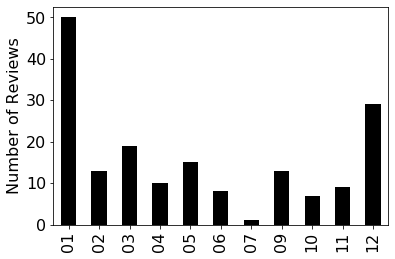

In [39]:
#Q23: What is the relationship between the month and the total number of reviews for the product 'Fire Kids Edition Tablet, 
# 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case' for each month?
result = month_with_num_reviews("B018Y226XO")
plot_dict(result, label="Number of Reviews")

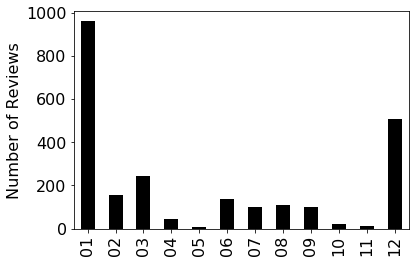

In [40]:
#Q24: What is the relationship between the month and the total number of reviews for the product 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta' for each month
result = month_with_num_reviews("B018Y229OU")
plot_dict(result, label="Number of Reviews")

In [41]:
# Problem 1: Factorial
def fact(n):
    if n == 1:
        return 1
    return n * fact(n-1)
fact(4)

24

In [42]:
# Problem 2: String Reversal
def reverse(s):
    if len(s) <= 1:
        return s
    return reverse(s[1:]) + s[0]
reverse('NACIREMA')

'AMERICAN'

In [43]:
# Problem 3: List Reversal
def list_reverse(list):
    if len(list) <= 1:
        return list
    return list_reverse(list[1:]) + [list[0]]
list_reverse([1,2,3])

[3, 2, 1]

In [44]:
# Problem 4: Dictionary Printer
def dprint(dictionary, indent=0):
    print("Dictionary:")
    for key in dictionary:
        # key = "B"
        value = dictionary[key] # value =  {"C": 2, "D": 3, "E": {"F": 4}}
        print(" " * indent, end="")
        print(key + " => ", end="") # A => B 
        if type(value) == dict:
            dprint(value, indent + 2)
        else:
            print(value)
dprint({"A": 1, "B": {"C": 2, "D": 3, "E": {"F": 4}}, "G": 5})

Dictionary:
A => 1
B => Dictionary:
  C => 2
  D => 3
  E => Dictionary:
    F => 4
G => 5


In [45]:
# List Comprehensions
nums = [500, 100, 200, 300, 400]
new_nums = []
for x in nums:
    new_nums.append(x+1)
new_nums

[501, 101, 201, 301, 401]

In [46]:
nums = [500, 100, 200, 300, 400]
new_nums = [x+1 for x in nums]
new_nums

[501, 101, 201, 301, 401]

In [47]:
nums = [500, 100, 200, 300, 400]
doubles = [orig_num * 2 for orig_num in nums]
doubles

[1000, 200, 400, 600, 800]

In [48]:
words = ["Apple", "banana", "ORANGE"]
upper_words = [word.upper() for word in words]
upper_words

['APPLE', 'BANANA', 'ORANGE']

In [49]:
# Default Dictionaries
fruit_counts = {}
fruit_counts["apple"] = 10    # line 1: works
print(fruit_counts["apple"])  # line 2: works
#print(fruit_counts["banana"]) # line 3: fails

10


In [50]:
from collections import defaultdict

fruit_counts = defaultdict(int)
fruit_counts["apple"] = 10    # line 1: works
print(fruit_counts["apple"])  # line 2: works
print(fruit_counts["banana"]) # line 3: works

10
0


In [51]:
rows = [
     ("alice", 5),
     ("bob", 6),
     ("alice", 7),
     ("bob", 8),
]

scores = dict()
for row in rows:
    if not row[0] in scores:
        scores[row[0]] = [row[1]]
    else:
        scores[row[0]].append(row[1])

scores

{'alice': [5, 7], 'bob': [6, 8]}

In [52]:
rows = [
     ("alice", 5),
     ("bob", 6),
     ("alice", 7),
     ("bob", 8),
]

scores = defaultdict(list)
for row in rows:
    scores[row[0]].append(row[1]) # creates a new list if necessary

dict(scores)

{'alice': [5, 7], 'bob': [6, 8]}

In [53]:
from collections import defaultdict

letter_counts = defaultdict(int)

for letter in "banana":
    letter_counts[letter] += 1

dict(letter_counts)

{'b': 1, 'a': 3, 'n': 2}

In [54]:
#Q25: List the paths in the very_helpful directory of rating4 of broken_file.
def get_paths2(directory):
    file_list = os.listdir(directory)
    #print(file_list)
    total_file = []
    for file in file_list:
        #print(file)
        path = os.path.join(directory, file)
        #print(path)
        if os.path.isdir(path):
            if directory == os.path.join('broken_file', 'rating4') and file == 'very_helpful':
                total_file = get_paths(path)
                break
            else:
                total_file += get_paths2(path)
        else:
            total_file.append(path)
    return sorted(total_file, reverse = True)

get_paths2(os.path.join('broken_file', 'rating4'))

['broken_file\\rating4\\very_helpful\\very_helpful.json']

In [55]:
#Q26: List the paths of all the files in the rating5 directory of broken_file.
get_paths2(os.path.join('broken_file', 'rating5'))

['broken_file\\rating5\\others.json',
 'broken_file\\rating5\\helpful\\helpful.json']

In [56]:
#Q27: List the paths of all the files in the broken_file directory.
def get_path3(directory):
    file_list = os.listdir(directory)
    total_file = []
    for file in file_list:
        path = os.path.join(directory, file)
        if os.path.isdir(path):
            total_file += get_path3(path)
        else:
            total_file.append(path)
    return sorted(total_file, reverse = True)
get_path3('broken_file')

['broken_file\\rating5\\others.json',
 'broken_file\\rating5\\helpful\\helpful.json',
 'broken_file\\rating4\\very_helpful\\very_helpful.json',
 'broken_file\\rating4\\others\\short\\short.json',
 'broken_file\\rating4\\others\\others\\others.json',
 'broken_file\\rating4\\not_helpful.json',
 'broken_file\\rating3\\others\\others.json',
 'broken_file\\rating3\\long\\long.json',
 'broken_file\\others.json']

In [57]:
def read_json2(json_filename):
    f = open(os.path.join("broken_file", json_filename), encoding="utf-8")
    string = f.read()
    json_str = json.loads(string)
    f.close() 
    return json_str

In [58]:
#Q28: Combine all the files in broken_file directory and find the number of unique products being reviewed in these files.
def json_get_unique_products():
    json_list = get_path3('broken_file')
    total_data = {}
    products_list = []
    for file in json_list:
        file = file[12:]
        data = read_json2(file)
        for key in data:
            if data[key][-1] not in products_list:
                products_list.append(data[key][-1])
    return len(products_list)
        
json_get_unique_products()     


1

In [59]:
def broken_file_total_data():
    json_list = get_path3('broken_file')
    total_data = {}
    products_list = []
    for file in json_list:
        file = file[12:]
        data = read_json2(file)
        for key in data:
            total_data[key] = data[key]
    return total_data

In [60]:
#Q29: Combine all the files in the directories data and broken_file, and find the total number of reviews.
def combine_all_data():
    with open(os.path.join('data', 'broken_data.json'), "w") as json_file:
        json.dump(broken_file_total_data(), json_file)
    #https://rfriend.tistory.com/474 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]
    
    data1 = get_reviews('review1.csv', 'review1.json')
    data2 = get_reviews('review2.csv', 'review2.json')
    data3 = get_reviews('review3.csv', 'broken_data.json')
    data4 = get_reviews('review4.csv', 'review4.json')
    data5 = get_reviews('review5.csv', 'review5.json')
    data_list = [data1, data2, data3, data4, data5]
    final_data = []
    
    for data in data_list:
        final_data += data
    
    return len(final_data)
combine_all_data()

4995

In [61]:
os.remove(os.path.join("data", "broken_data.json"))

In [62]:
def get_product_avg_rating(product_name):
    products = read_json("products.json")
    product_dict = {}
    total_reviews = get_total_reviews()
    
    for product in products:
        if product == product_name:
            product_dict[product] = []
    
    for review in total_reviews:
        rating = review.rating
        product_dict[product_name].append(rating)
    
    for product in product_dict:
        product_dict[product] = statistics.mean(product_dict[product])
    
    return product_dict

In [63]:
#Q30: What is the percentage of change in the average rating changed for the product 'Fire Tablet, 7 Display', 
#because of the addition of the new data?
def percent_rating_change(product):
    before_avg = get_product_avg_rating("B018Y229OU")[product]
    combine_all_data()
    after_avg = get_product_avg_rating("B018Y229OU")[product]
    
    return (before_avg - after_avg) * 100 / before_avg

percent_rating_change("B018Y229OU")

0.0

In [64]:
os.remove(os.path.join("data", "broken_data.json"))